## Inflation Notebook
By Stan Mohler, Jr.

This Notebook explores Milton Friedman's beliefs about inflation described in his 1980 book [Free to Choose](https://en.wikipedia.org/wiki/Free_to_Choose).  

We'll see that data measured in the decades after his book was published seem to reveal big weaknesses in Friedman's ideas. 

Disclaimer: I am NOT an economist.  Just a software engineer and aspiring informed citizen.  

In [1]:
import pandas as pd
import numpy as np
import math
import scipy
import matplotlib
import matplotlib.pyplot as plt

import holoviews as hv
import hvplot.pandas
import panel as pn

### Set the web links from which to retrieve economic data
Data come from the Federal Reserve's [FRED site](https://fred.stlouisfed.org/).  

* M2, the money supply using the old definition, discontinued in 2017 (maybe used by Friedman) - [LINK](https://fred.stlouisfed.org/series/MYAGM2USM052S)
* M2, the money supply using the new definition, from 1980 onwards - [LINK](https://fred.stlouisfed.org/series/WM2NS)
* Real Gross Domestic Product (Real GDP) - [LINK](https://fred.stlouisfed.org/series/GDPC1)
* Consumer Price Index (CPI) - [LINK](https://fred.stlouisfed.org/series/CPIAUCSL)

In [2]:
# Old definition of M2, the money supply, used by Friedman but discontinued in 2017
# https://fred.stlouisfed.org/series/MYAGM2USM052S
old_m2_url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=MYAGM2USM052S&scale=left&cosd=1959-01-01&coed=2017-03-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2017-03-01&line_index=1&transformation=lin&vintage_date=2022-05-29&revision_date=2022-05-29&nd=1959-01-01'

# New definition of M2, the money supply, from 1980 onwards
# https://fred.stlouisfed.org/series/WM2NS
new_m2_url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=WM2NS&scale=left&cosd=1980-11-03&coed=2023-12-04&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Weekly%2C%20Ending%20Monday&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-12-31&revision_date=2023-12-31&nd=1980-11-03'

# Real Gross Domestic Product (Real GDP)
# https://fred.stlouisfed.org/series/GDPC1
gdp_url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDPC1&scale=left&cosd=1947-01-01&coed=2023-07-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-12-31&revision_date=2023-12-31&nd=1947-01-01'

# Consumer Price Index (CPI)
# https://fred.stlouisfed.org/series/CPIAUCSL
cpi_url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CPIAUCSL&scale=left&cosd=1947-01-01&coed=2023-11-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-12-31&revision_date=2023-12-31&nd=1947-01-01'

### Retrieve M2 data as defined until 2017 ("old M2")

See https://fred.stlouisfed.org/series/MYAGM2USM052S

In [3]:
old_m2_df = pd.read_csv(old_m2_url)
#old_m2_df.head(3)

<Axes: xlabel='DATE', ylabel='Old M2 ($)'>

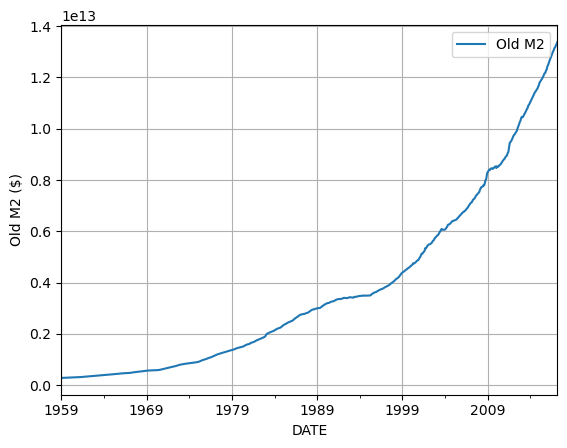

In [4]:
old_m2_df.rename(columns = {'MYAGM2USM052S': 'Old M2'}, inplace=True)
old_m2_df.index = pd.to_datetime( old_m2_df['DATE'] )
old_m2_df.drop(columns=['DATE'], inplace=True)

old_m2_df.plot(ylabel='Old M2 ($)', grid='both')

### Retrieve M2 data as defined after 2017 ("new M2")

See https://fred.stlouisfed.org/series/WM2NS

In [5]:
new_m2_df = pd.read_csv(new_m2_url)
#new_m2_df

<Axes: xlabel='DATE', ylabel='New M2 ($)'>

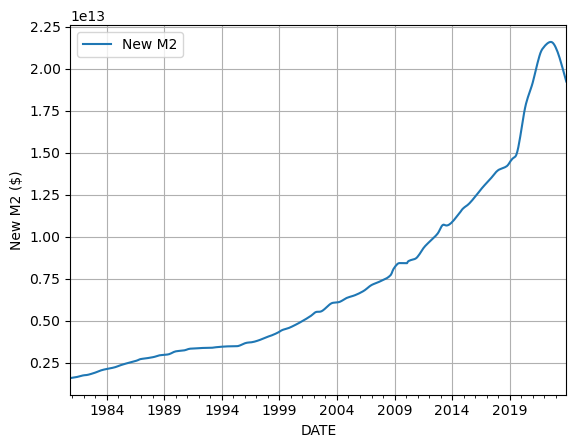

In [6]:
new_m2_df.rename(columns = {'WM2NS': 'New M2'}, inplace=True)  
new_m2_df.index = pd.to_datetime( new_m2_df['DATE'] )
new_m2_df.drop(columns=['DATE'], inplace=True)

# convert from billions of dollars to dollars, like old M2
new_m2_df['New M2'] *= 1e9  

# resample to the 1st of the month, like old M2
new_m2_df = new_m2_df.resample('MS').asfreq()
new_m2_df['New M2'] = new_m2_df['New M2'].interpolate(method='pchip')

new_m2_df.plot(ylabel='New M2 ($)', grid='both')

### Show that old & new M2 definitions are very similar
The two curves overlap in time.  Their values come **very close to matching**.  

In [7]:
merged_m2_df = old_m2_df.merge(new_m2_df, on="DATE", how="outer", sort=True)
#merged_m2_df[500:505]

<Axes: xlabel='DATE', ylabel='M2 ($)'>

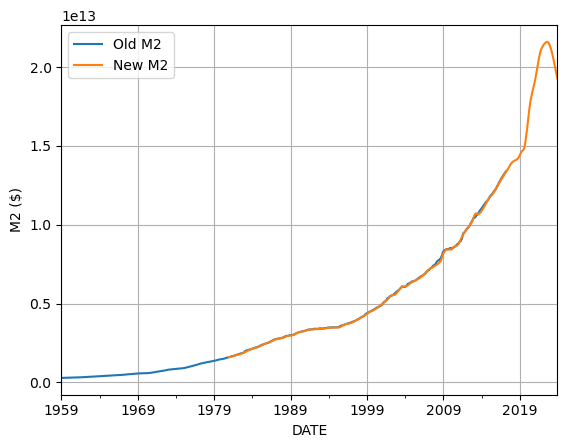

In [8]:
merged_m2_df.plot(ylabel='M2 ($)', grid='both')

<Axes: xlabel='DATE'>

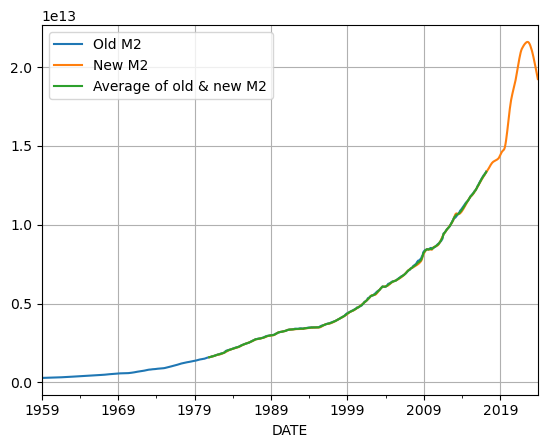

In [9]:
merged_m2_df['Average of old & new M2'] = 0.5 * merged_m2_df['Old M2'] + 0.5 * merged_m2_df['New M2']
merged_m2_df.plot(grid='both')

### Smoothly combine old and new M2 into one single curve called "M2"
Since the old and new definitions of M2 practically match, then average them together in the overlap region, producing a single graph of M2 that covers 1959 to the present.

In [10]:
overlap_df = merged_m2_df[ ~pd.isnull(merged_m2_df['Average of old & new M2']) ]
overlap_df = overlap_df.drop(columns=['Old M2', 'New M2'])
overlap_df.rename(columns = {'Average of old & new M2': 'M2'}, inplace=True)
#overlap_df

In [11]:
time_overlap_starts = overlap_df.index[0]
time_overlap_ends   = overlap_df.index[-1]

print(f'Time period of overlap: {time_overlap_starts}   to   {time_overlap_ends}')

Time period of overlap: 1980-12-01 00:00:00   to   2017-03-01 00:00:00


In [12]:
before_1980_df = merged_m2_df[ merged_m2_df.index < time_overlap_starts]
before_1980_df = before_1980_df.drop(columns=['New M2', 'Average of old & new M2'])
before_1980_df = before_1980_df.rename(columns = {'Old M2': 'M2'})
#before_1980_df

In [13]:
after_2017_df = merged_m2_df[ merged_m2_df.index > time_overlap_ends]
after_2017_df = after_2017_df.drop(columns=['Old M2', 'Average of old & new M2'])
after_2017_df.rename(columns = {'New M2': 'M2'}, inplace=True)
#after_2017_df

<Axes: title={'center': 'Money Supply (all retrieved M2 Data)'}, xlabel='time', ylabel='M2 ($)'>

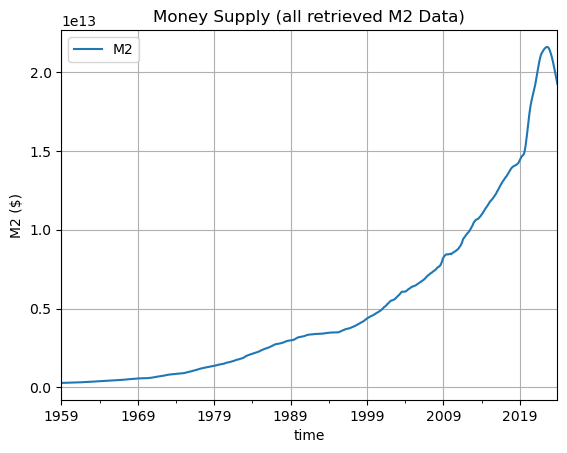

In [14]:
m2_df = pd.concat([before_1980_df, overlap_df, after_2017_df])

m2_df.plot(title='Money Supply (all retrieved M2 Data)', xlabel='time', ylabel='M2 ($)', grid='both')

### Add a column of M2 values as they were 6 months before any given date
Per page 256 of Free to Choose, so that we can directly compare CPI to M2 measured 6 months earlier.

In [15]:
m2shifted_df = m2_df.copy()
m2shifted_df.index = m2shifted_df.index.shift(6, freq='MS')  # 'MS' means month start, i.e., the 1st of each month
m2shifted_df.rename(columns={'M2':'M2_6mo_earlier'}, inplace=True)
m2_df = m2_df.merge(m2shifted_df, on="DATE", how="outer", sort=True)

m2_df.tail(12)

,M2,M2_6mo_earlier
DATE,,
2023-07-01,2.027204e+13,2.126447e+13
2023-08-01,2.006717e+13,2.112984e+13
2023-09-01,1.985800e+13,2.099313e+13
2023-10-01,1.965362e+13,2.082713e+13
2023-11-01,1.944261e+13,2.065390e+13
2023-12-01,1.924069e+13,2.046408e+13
2024-01-01,NaN,2.027204e+13
2024-02-01,NaN,2.006717e+13
2024-03-01,NaN,1.985800e+13


<Axes: xlabel='DATE'>

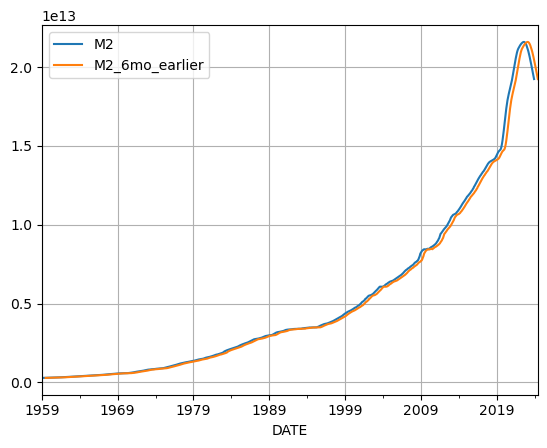

In [16]:
m2_df.plot(grid='both')

### Plot Real GDP
Measured in billions of 2017 dollars, seasonaly adjusted

An absolute measure of total national output

https://fred.stlouisfed.org/series/GDPC1

In [17]:
gdp_df = pd.read_csv(gdp_url)
gdp_df.rename(columns = {'GDPC1': 'Real GDP'}, inplace=True)
gdp_df.index = pd.to_datetime( gdp_df['DATE'] )
gdp_df.drop(columns=['DATE'], inplace=True)
gdp_df = gdp_df.resample('MS').asfreq()
gdp_df['Real GDP'] = gdp_df['Real GDP'].interpolate(method='pchip')

#gdp_df['Real GDP'].plot(xlabel='time', ylabel='Real GDP (billions of 2017 $)', grid='both', title='Real GDP')

In [18]:
gdpshifted_df = gdp_df.copy()
gdpshifted_df.index = gdpshifted_df.index.shift(6, freq='MS')  # 'MS' means month start, i.e., the 1st of each month
gdpshifted_df.rename(columns={'Real GDP':'Real_GDP_6mo_earlier'}, inplace=True)
gdp_df = gdp_df.merge(gdpshifted_df, on="DATE", how="outer", sort=True)

gdp_df.tail(12)

,Real GDP,Real_GDP_6mo_earlier
DATE,,
2023-02-01,22148.246943,21898.993998
2023-03-01,22180.031027,21946.204117
2023-04-01,22225.350000,21989.981000
2023-05-01,22291.633326,22032.616631
2023-06-01,22384.264716,22072.205963
2023-07-01,22490.692000,22112.329000
2023-08-01,NaN,22148.246943
2023-09-01,NaN,22180.031027
2023-10-01,NaN,22225.350000


<Axes: xlabel='DATE'>

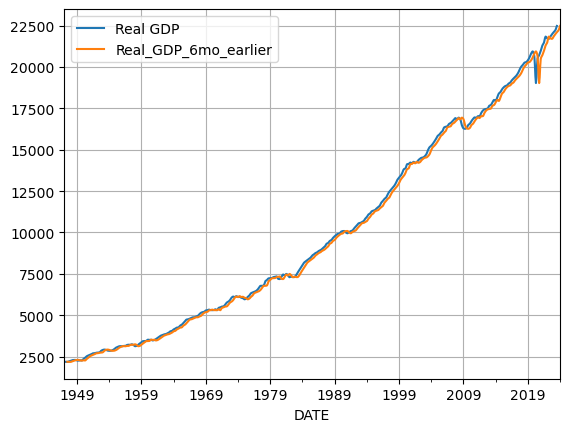

In [19]:
gdp_df.plot(grid='both')

### Plot the Consumer Price Index (CPI)

A measure of how prices changed over time

See https://fred.stlouisfed.org/series/CPIAUCSL

<Axes: title={'center': 'Consumer Price Index (CPI)'}, xlabel='time', ylabel='CPI'>

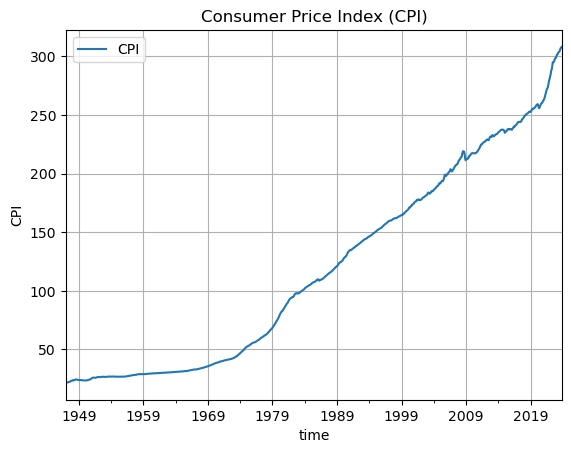

In [20]:
cpi_df = pd.read_csv(cpi_url)
cpi_df.rename(columns = {'CPIAUCSL': 'CPI'}, inplace=True)
cpi_df.index = pd.to_datetime( cpi_df['DATE'] )
cpi_df.drop(columns=['DATE'], inplace=True)
cpi_df.plot(xlabel='time', ylabel='CPI', grid='both', title='Consumer Price Index (CPI)')

### Combine all the data into a single table

Only keep the time period for which all columns have data.  

In [21]:
big_df = m2_df.merge(gdp_df, on="DATE", how="outer", sort=True).merge(cpi_df, on="DATE", how="outer", sort=True)
big_df = big_df[ ~pd.isnull(big_df['M2']) & ~pd.isnull(big_df['M2_6mo_earlier']) & ~pd.isnull(big_df['Real GDP']) & ~pd.isnull(big_df['CPI'])]
big_df

,M2,M2_6mo_earlier,Real GDP,Real_GDP_6mo_earlier,CPI
DATE,,,,,
1959-07-01,2.952000e+11,2.866000e+11,3430.057000,3352.129000,29.150
1959-08-01,2.964000e+11,2.877000e+11,3431.905331,3382.544087,29.180
1959-09-01,2.967000e+11,2.892000e+11,3435.098595,3411.560962,29.250
1959-10-01,2.965000e+11,2.901000e+11,3439.832000,3427.667000,29.350
1959-11-01,2.971000e+11,2.922000e+11,3462.831234,3428.683866,29.350
...,...,...,...,...,...
2023-03-01,2.099313e+13,2.158081e+13,22180.031027,21946.204117,301.744
2023-04-01,2.082713e+13,2.153888e+13,22225.350000,21989.981000,303.032
2023-05-01,2.065390e+13,2.146953e+13,22291.633326,22032.616631,303.365


### Compute the quantity of money per unit of output, as graphed in Free to Choose

In [22]:
big_df['M2/Real_GDP_6mo_earlier'] = big_df['M2_6mo_earlier'] / big_df['Real_GDP_6mo_earlier']
big_df

,M2,M2_6mo_earlier,Real GDP,Real_GDP_6mo_earlier,CPI,M2/Real_GDP_6mo_earlier
DATE,,,,,,
1959-07-01,2.952000e+11,2.866000e+11,3430.057000,3352.129000,29.150,8.549790e+07
1959-08-01,2.964000e+11,2.877000e+11,3431.905331,3382.544087,29.180,8.505432e+07
1959-09-01,2.967000e+11,2.892000e+11,3435.098595,3411.560962,29.250,8.477058e+07
1959-10-01,2.965000e+11,2.901000e+11,3439.832000,3427.667000,29.350,8.463483e+07
1959-11-01,2.971000e+11,2.922000e+11,3462.831234,3428.683866,29.350,8.522221e+07
...,...,...,...,...,...,...
2023-03-01,2.099313e+13,2.158081e+13,22180.031027,21946.204117,301.744,9.833505e+08
2023-04-01,2.082713e+13,2.153888e+13,22225.350000,21989.981000,303.032,9.794862e+08
2023-05-01,2.065390e+13,2.146953e+13,22291.633326,22032.616631,303.365,9.744430e+08


### Define a function to plot data

In [23]:
def friedman_plot(df, start_time, end_time, title, using_panel=False):
    
    plot_df = df[start_time:end_time].copy()
    
    # like Friedman, plot the percentage by which each quantity varies from its average over the time period
    
    avg_m2_over_gdp = plot_df['M2/Real_GDP_6mo_earlier'].mean()
    plot_df['M2 / Real GDP, 6 mo. earlier, scaled'] = plot_df['M2/Real_GDP_6mo_earlier'] / avg_m2_over_gdp * 100

    avg_cpi = plot_df['CPI'].mean()
    plot_df['CPI, scaled'] = plot_df['CPI'] / avg_cpi * 100
        
    if using_panel:
        columns_to_drop = [ c for c in plot_df.columns if c != 'M2 / Real GDP, 6 mo. earlier, scaled' and c != 'CPI, scaled' ]
        plot_df.drop(columns=columns_to_drop, inplace=True)
        return plot_df.hvplot()
        
    f=plt.figure()
    f.set_figwidth(14)
    f.set_figheight(9)

    t  = plot_df.index
    y1 = plot_df['M2 / Real GDP, 6 mo. earlier, scaled']
    y2 = plot_df['CPI, scaled']

    plt.semilogy()
    plt.plot(t, y1, color='g', label='Quantity of Money per Unit of Output (M2 / Real GDP) 6 mos. earlier')
    plt.plot(t, y2, color='r', label='CPI')
  
    # plot vertical lines at particular times of interest
    
    trump_inaugurated         = pd.Timestamp('2017-01-17')
    fed_huge_expansion_starts = pd.Timestamp('2019-09-16')
    fed_huge_expansion_ends   = pd.Timestamp('2020-04-01')
    biden_inaugurated         = pd.Timestamp('2021-01-21')
    
    if start_time <= trump_inaugurated and trump_inaugurated <= end_time:
        plt.axvline( trump_inaugurated, color='red', label='Trump inaugurated', linestyle='--', alpha=0.5)
        
    if start_time <= fed_huge_expansion_starts and fed_huge_expansion_starts <= end_time:
        plt.axvline( fed_huge_expansion_starts, color='black', label='Fed starts large expansion of money supply', linestyle='--')

    if start_time <= fed_huge_expansion_ends and fed_huge_expansion_ends <= end_time:
        plt.axvline( fed_huge_expansion_ends, color='black', label='Fed ends large expansion of money supply, PANDEMIC hits US', linestyle='--')
    
    if start_time <= biden_inaugurated and biden_inaugurated <= end_time:
        plt.axvline( biden_inaugurated, color='blue', label='Biden inaugurated', linestyle='--', alpha=0.5)

    # finish plot
    
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Percentage of average over the time period')
    
    ax = plt.gca()
    y_min = math.floor(min(y1.min(), y2.min()) / 10) * 10
    y_max = math.ceil(max(y1.max(), y2.max()) / 10) * 10
    ax.set_yticks(range(y_min, y_max + 1, 10))
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    plt.grid('both')
    plt.grid(which='minor',axis='y')
    plt.legend()
    
    plt.show()

### Reproduce Milton Friedman's plot - *Free to Choose*, Figure 1, page 257
**It covers 13 years.**

It shows how **inflated prices closely followed recent inflation of the money supply**.

As in Friedman's plot, both curves below are scaled to be each quantity's percentage of its average over the time period.  

And like Friedman's plot, the money supply values are for dates several months earlier than shown, to avoid confusing which quantity might have caused the other.  Friedman didn't say how many months he used for this particular plot, but on page 256 he did say, "...on most of the charts the number plotted for the quantity of money is for a year ending six months earlier than the year to which the matching price index corresponds."  So that's what I did in my plots here.  

Finally, like Friedman, the vertical axis is on a log scale.  

My plot below doesn't *exactly* match Friedman's plot, but it's close.  So close, I think he could have replaced his with mine.

Notice below how tightly correlated the Consumer Price Index is with the money supply (6 months earlier).  **This correlation must have persuaded millions of people that Friedman was right.**

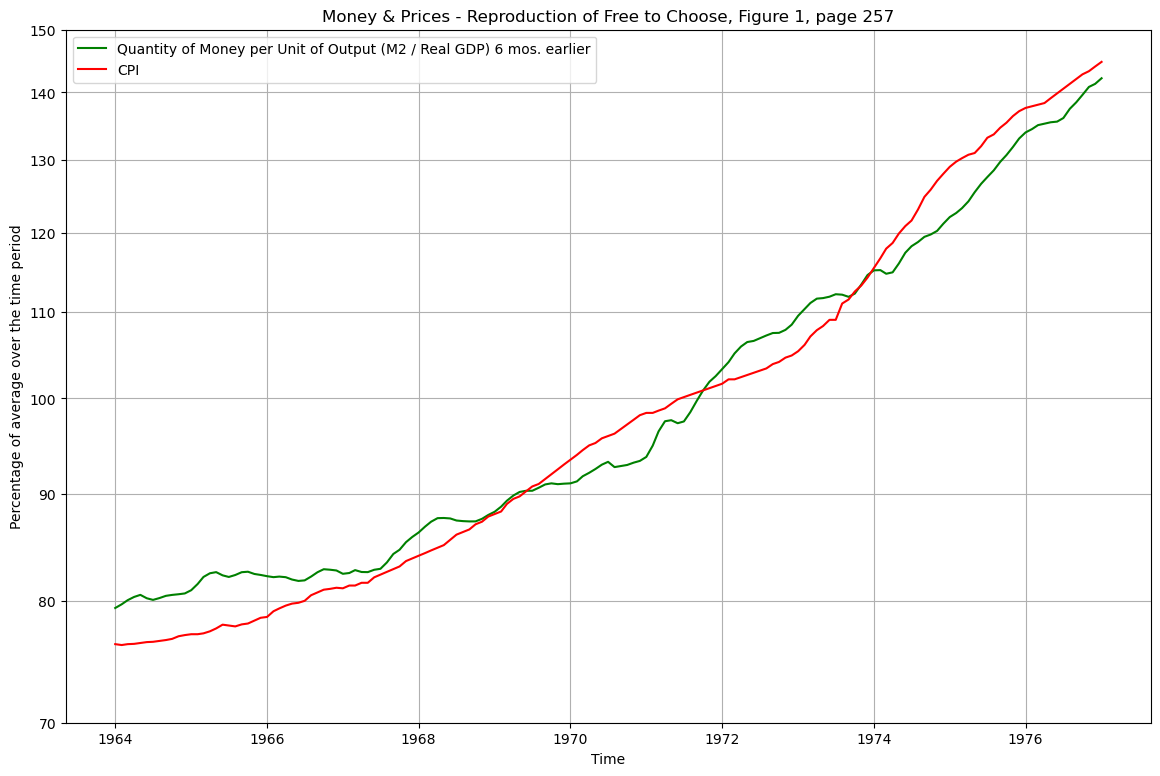

In [24]:
start_time = pd.Timestamp('1964-01-01')
end_time   = pd.Timestamp('1977-01-01')

friedman_plot(big_df, start_time, end_time, 'Money & Prices - Reproduction of Free to Choose, Figure 1, page 257')

### Update Milton Friedman's plot for today
**How many of Friedman's fans have checked to see whether the correlation above still holds?  Let's do so now.**

The graph below covers the 13 years from Jan. 2009 to Jan. 2022.

**NOTICE:**
* In recent years, prices (in red) have **not risen nearly as fast as the money supply, contrary to Friedman.**  Especially after the huge jump in money supply around 2020 (in green).  
* For some reason, **it appears the Fed greatly inflated the money supply during Trump's term.**
* Why did the Fed do that?  **Maybe to prevent a financial crisis?**  See the articles below:
  * [Federal reserve article](https://www.federalreserve.gov/econres/notes/feds-notes/what-happened-in-money-markets-in-september-2019-20200227.htm)
  * [New York Times, October 2019](https://www.nytimes.com/2019/10/11/business/economy/federal-reserve-treasury-bills.html)
* If you believe Friedman, the apparently huge money supply expansion **during Trump's term** would likely be **an important cause of the inflation that appeared during Biden's term.**  (**Soapbox:** At least, believers in Friedman should think so, though they might not want to admit it.  As discussed above, Friedman assumed there would be a many-months **lag** between expanding the money supply and a subsequent jump in prices.  I'd think there could certainly be a further delay after that for people to fully realize prices are rising faster - possibly even delayed into the term of the next president who then gets unfairly blamed for something the Fed, or someone or something else, did before he or she took office.)

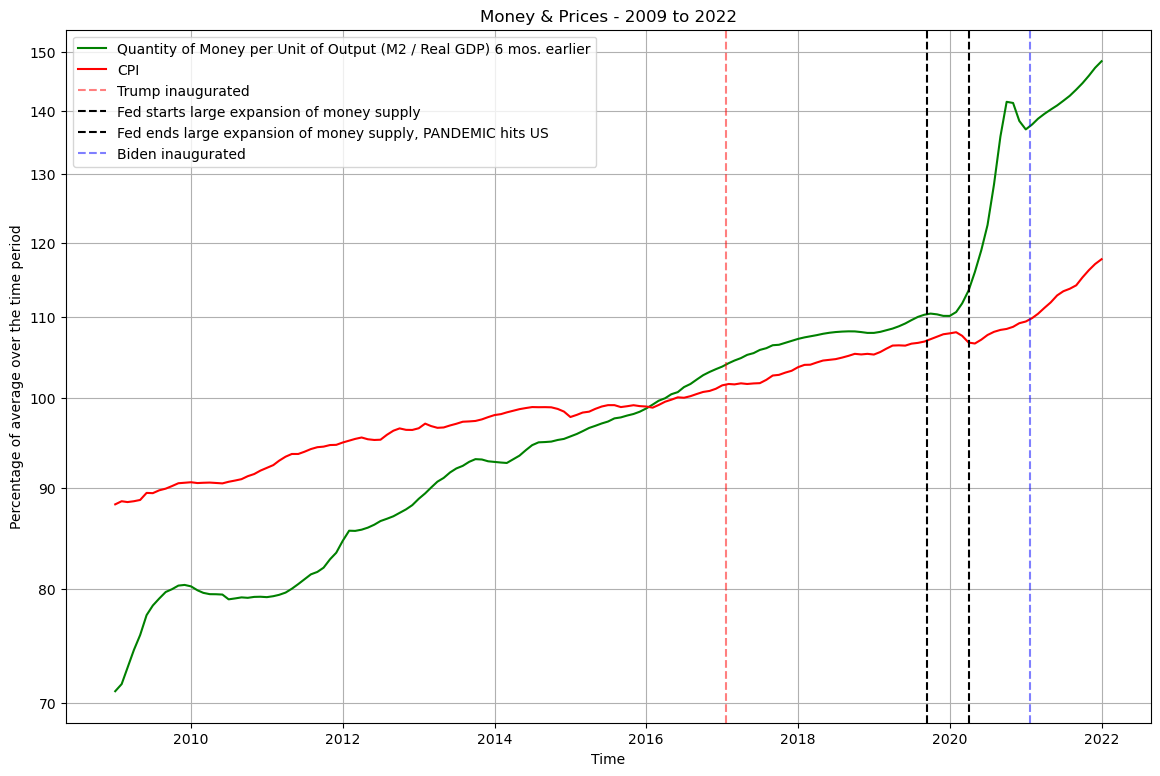

In [25]:
start_time = pd.Timestamp('2009-01-01')
end_time   = pd.Timestamp('2022-01-01')

friedman_plot(big_df, start_time, end_time, 'Money & Prices - 2009 to 2022')

Now let's look at the correlation **starting with where Friedman's graph ended (1978)** and going to 2023. 

Notice below: **The tidy graph shown in Friedman's book has broken down.**

There's no more "tight correlation" between prices and money supply.  

However, there is *some* connection.  You can see the green money supply curve bending down at the end, in response to the Fed fighting inflation by tightening the money supply.  

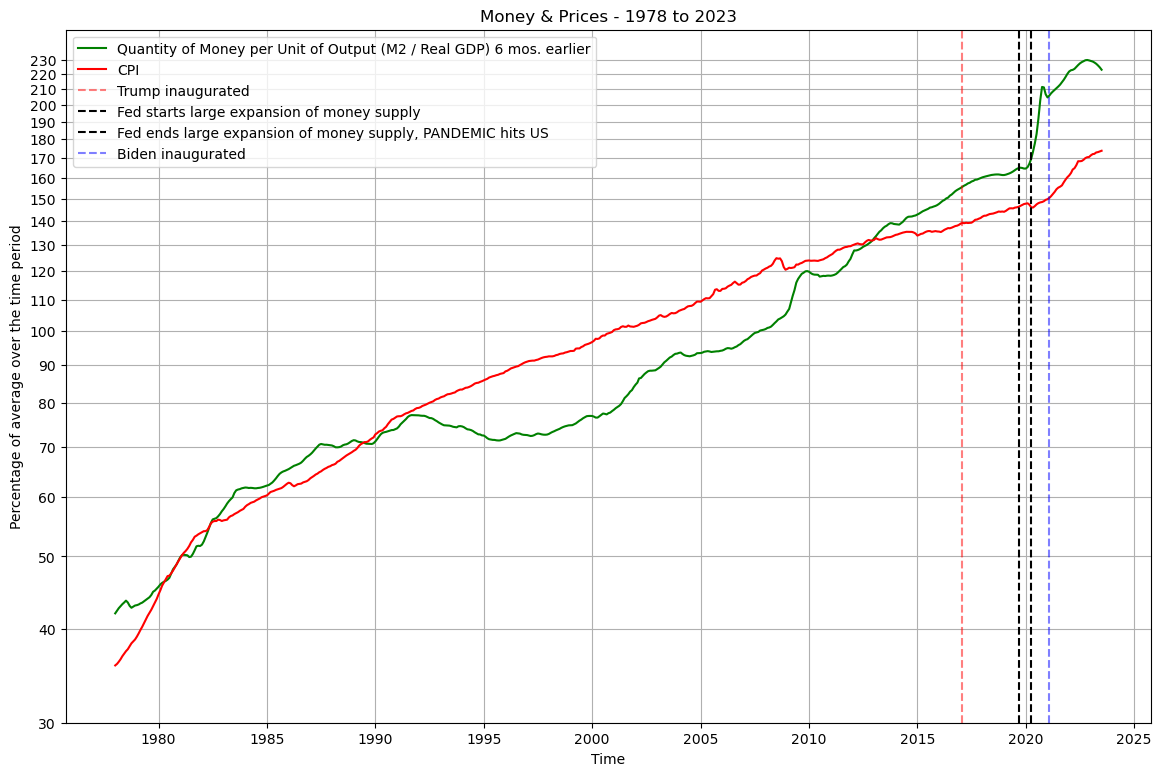

In [26]:
start_time = pd.Timestamp('1978-01-01')
end_time   = pd.Timestamp('2023-12-31')

friedman_plot(big_df, start_time, end_time, 'Money & Prices - 1978 to 2023')

### Interactive Plot
**You can explore different time periods by dragging the sliders below.**  (It won't work if you're viewing this Notebook directly in GitHub's web site.)

In particular notice how **Friedman's tight correlation** between money supply and price rise **breaks down in the early 1990s and beyond.**

In [27]:
def create_plot(end_year, time_span_years):
    
    start_year = end_year - time_span_years  
    end_time   = pd.Timestamp( str(end_year)   + '/01/01')
    start_time = pd.Timestamp( str(start_year) + '/01/01')
    
    return friedman_plot(big_df, start_time, end_time, 'Money & Prices', using_panel=True)

In [28]:
dmap = hv.DynamicMap(create_plot, kdims=['end_year', 'time_span_years']).redim.range(
    end_year=(1960,2023), time_span_years=(1,13))

hv_panel = pn.panel(dmap)
widgets  = hv_panel[1]

pn.Column(
    pn.Row(*widgets),
    hv_panel[0])

# TODO - fix Pandas deprecation warning

C:\Users\Stan\miniconda3\envs\inflation\lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
C:\Users\Stan\miniconda3\envs\inflation\lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


Column
    [0] Row
        [0] IntSlider(end=2023, margin=(20, 20, 5, 20), name='end_year', start=1960, value=1960, width=250)
        [1] IntSlider(end=13, margin=(5, 20, 20, 20), name='time_span_years', start=1, value=1, width=250)
    [1] HoloViews(DynamicMap, height=300, sizing_mode='fixed', width=700)

### Velocity of Money
According to Binyamin Appelbaum's 2019 book [The Economist's Hour](https://www.audible.com/pd/The-Economists-Hour-Audiobook/1478992654?qid=1656042991&sr=1-1&ref=a_search_c3_lProduct_1_1&pf_rd_p=83218cca-c308-412f-bfcf-90198b687a2f&pf_rd_r=C8G2QWMFM6HJBVWFDWCJ)
, page 84, Milton Friedman had believed the velocity of money would always be reliably stable.  

Velocity is the number of times a year the average dollar changes hands.  

Appelbaum asserts that Friedman was wrong.  After 1981, the velocity began to "jump around" due to financial deregulation. 

**Let's see for ourselves, below.**  (The Fed provides the velocity of M2 at https://fred.stlouisfed.org/series/M2V.)

<Axes: title={'center': 'M2 Velocity'}, xlabel='time', ylabel='M2 Velocity (turnover per year)'>

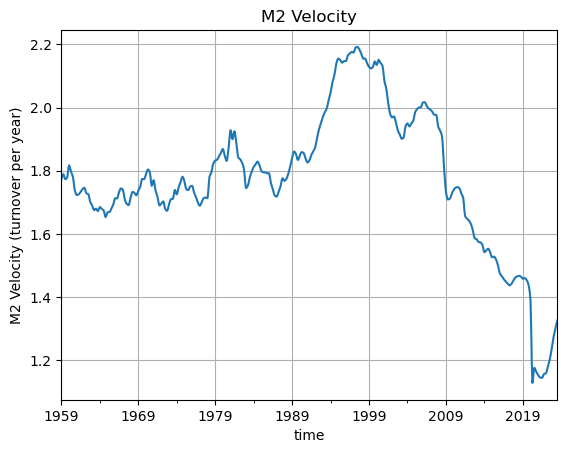

In [29]:
# retrieve velocity data
v_url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=M2V&scale=left&cosd=1959-01-01&coed=2023-07-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-12-31&revision_date=2023-12-31&nd=1959-01-01'
v_df = pd.read_csv(v_url)

# clean & organize the data
v_df.rename(columns = {'M2V': 'V'}, inplace=True)
v_df.index = pd.to_datetime( v_df['DATE'] )
v_df.drop(columns=['DATE'], inplace=True)
v_df = v_df.resample('MS').asfreq()    # 'MS' means "month start", i.e., 1st of every month
v_df['V'] = v_df['V'].interpolate(method='pchip')

# plot velocity
v_df['V'].plot(xlabel='time', ylabel='M2 Velocity (turnover per year)', grid='both', title='M2 Velocity')

**As we see above, Appelbaum is right.  Friedman was wrong.**
After the 1980s, well after Friedman's book was published, the velocity of money underwent much larger fluctuations.  

When the velocity tanked after 2008, it was as if **a large amount of money got put under mattresses somewhere.**  

Maybe into some kind of financial savings where the money languished rather than being spent or loaned out?  Such as...shored up bank reserves to recapitalize banks?  

YES INDEED.  In his 2014 book [After the Music Stopped](https://www.audible.com/pd/After-the-Music-Stopped-Audiobook/B00K539JUE?eac_link=rXU54i20Eyli&ref=web_search_eac_asin_1&eac_selected_type=asin&eac_selected=B00K539JUE&qid=OPiVwwWOUF&eac_id=140-4032528-9510714_OPiVwwWOUF&sr=1-1), economist [Alan Blinder](https://www.audible.com/author/Alan-S-Blinder/B001ILIB3I?ref_pageloadid=not_applicable&ref=a_pd_After-_c1_author_1&pf_rd_p=df6bf89c-ab0c-4323-993a-2a046c7399f9&pf_rd_r=GYDV4PXK5DD6GWWX9P70&pageLoadId=zFGcnOHA7Xyy6eAp&ref_plink=not_applicable&creativeId=16015ba4-2e2d-4ae3-93c5-e937781a25cd) explained (starting at 9 hours, 22 minutes into the audiobook) that the Fed prevented banks from failing by shoring up their bank reserves with "Quantitative Easing."  And that the banks simply **sat on these "piles of excess reserves"**, too afraid to lend them out.  Therefore, no inflation.  Banks were still sitting on these reserves in 2014.  Blinder went on to explain that these excess reserves might eventually fuel "future inflation" when the banks start lending again.  However, in that case, the Fed could prevent inflation by simply and routinely withdrawing the reserves.

**When the Fed pumps large amounts of money into the economy, and that money just sits, the result is not more inflation.**  Obviously the velocity of money drops.  I'd think Friedman would have understood that.  Apparently he didn't.  

### Large Swings in the Money Velocity
Do the large swings in the money velocity explain why **the CPI stopped closely tracking the growth of the money supply starting in the '90s?**

Consider macroeconomic theory's "Equation of Exchange" which says **MV=PY**.
It's described in these three articles:
* [MIT](http://web.mit.edu/course/15/15.012cd/attach/Rec-9Feb01.pdf)
* [U. Minnesota](https://open.lib.umn.edu/macroeconomics/chapter/11-3-monetary-policy-and-the-equation-of-exchange/)
* [Pragmatic Capitalism](https://www.pragcap.com/the-mvpy-myth/)

Though imperfect, the equation says...

$$ {\text{(money supply)} \times \text{(money velocity)}} = \text{(price level)} \times \text{(nominal GDP)} $$

Rearranging:

$$ \text{(price level)} = {{\text{(money supply)} \times \text{(money velocity)}} \over \text{(nominal GDP)}} $$

Friedman thought (incorrectly) that velocity is always pretty constant.  (It only happened to be fairly constant in his heyday.)
Therefore, he thought...

$$ \text{(price level)} \propto {\text{(money supply)} \over \text{(nominal GDP)}} $$

Indeed, we see this exact correlation in his Figure 1, plotted further above.  

However, we now know his correlation often broke down, as shown by my plots above.  Friedman was wrong.  In reality, **prices often stay constant despite a rising money supply, apparently because the velocity falls sometimes.**

### My personal conclusions...
* Rising prices can be caused by at least two things: (1) an inflated money supply (in effect, increased "demand" in supply and demand) or (2) reduced real GDP (reduced "supply" in supply and demand).
* **IF** rising prices are caused by an inflated money supply, **control inflation by limiting the growth of the money supply, as Friedman taught.**
* **HOWEVER, in times when either the supply of goods, or the velocity of money, is declining**, as occurred in recent decades, **it's OK to expand the money supply rapidly**.  Inflation will **not** necessarily appear.

**Friedmanites, conservatives and libertarians don't seem to understand the 3rd bullet above.**  But that bullet is apparently why inflation remained low for years, even after the Fed's Quantitative Easing in the 2010s.  

It's also why we can welcome the Fed expanding the money supply in response to recessions and financial crises.

It might also be why the Fed can often ignore the [Phillips Curve](https://en.wikipedia.org/wiki/Phillips_curve) which says inflation must be controlled by maintaining a certain level of unemployment, accomplished by limiting the money supply more than actually necessary.  Economist Stephanie Kelton starts explaining it 2 hours, 13 minutes, 9 seconds into her audiobook [The Deficit Myth](https://www.audible.com/pd/The-Deficit-Myth-Audiobook/1549118048?qid=1708223815&sr=1-1&ref_pageloadid=not_applicable&ref=a_search_c3_lProduct_1_1&pf_rd_p=83218cca-c308-412f-bfcf-90198b687a2f&pf_rd_r=KH14H6XHZS2TFX0NJMD6&pageLoadId=oBM6poQJ42Qf2S8N&creativeId=0d6f6720-f41c-457e-a42b-8c8dceb62f2c). 

Critics of my conclusions might say I used data "fudged by the government."  But I'm using the same government sources of data that Friedman used.  

**UPDATE, 10/15/23:** Remember the recent **COVID-induced worldwide supply chain crisis?**  It was likely responsible for **much or most** of the recent spike in prices, in agreement with the theory of supply and demand and the first of my three bullets above.  This [10-minute NPR audiolink](https://www.npr.org/2023/09/14/1197954105/the-indicator-from-planet-money-draft-09-14-2023) explains it.  The crisis has largely resolved itself.  No wonder "inflation" is coming down so fast.  